The threshold of 0.5 is the default value in Logistic Regression. But based on different different problems this threshold value may change. We may have the discussion with domain expert and can decide other thresholds like 0.3, 0.4, 0.7. We need to come to a conclusion for a specific threshold value. ROC curve and ROC AUC score helps in deciding it. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_classes=2, random_state=42)


## Train Test Split

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [4]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [5]:
y_pred = model.predict(X_test)
y_pred

array([1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0])

In [6]:
y_pred_prob = model.predict_proba(X_test)
y_pred_prob

array([[4.19931091e-01, 5.80068909e-01],
       [1.40969604e-01, 8.59030396e-01],
       [5.08532523e-01, 4.91467477e-01],
       [1.31791655e-01, 8.68208345e-01],
       [5.21703453e-02, 9.47829655e-01],
       [9.39186107e-01, 6.08138932e-02],
       [7.78171117e-01, 2.21828883e-01],
       [1.88561984e-01, 8.11438016e-01],
       [2.55292019e-01, 7.44707981e-01],
       [6.62765922e-01, 3.37234078e-01],
       [5.01950468e-02, 9.49804953e-01],
       [4.41292340e-01, 5.58707660e-01],
       [9.95620384e-01, 4.37961605e-03],
       [5.44238440e-01, 4.55761560e-01],
       [2.58896799e-01, 7.41103201e-01],
       [8.14685260e-01, 1.85314740e-01],
       [9.40297613e-01, 5.97023874e-02],
       [5.33894329e-02, 9.46610567e-01],
       [1.29962431e-01, 8.70037569e-01],
       [5.14898680e-01, 4.85101320e-01],
       [7.59611431e-03, 9.92403886e-01],
       [7.78460309e-01, 2.21539691e-01],
       [9.49118219e-01, 5.08817814e-02],
       [9.08234080e-01, 9.17659197e-02],
       [3.664788

In [7]:
positive_predictions = y_pred_prob[:, 1] ## Extracting the 1st index from every element
positive_predictions

array([0.58006891, 0.8590304 , 0.49146748, 0.86820834, 0.94782965,
       0.06081389, 0.22182888, 0.81143802, 0.74470798, 0.33723408,
       0.94980495, 0.55870766, 0.00437962, 0.45576156, 0.7411032 ,
       0.18531474, 0.05970239, 0.94661057, 0.87003757, 0.48510132,
       0.99240389, 0.22153969, 0.05088178, 0.09176592, 0.96335211,
       0.00685461, 0.99952634, 0.93304963, 0.01782504, 0.96696169,
       0.87666331, 0.98637204, 0.53842264, 0.16137403, 0.29094555,
       0.2174457 , 0.06825803, 0.41370393, 0.05123198, 0.32707131,
       0.0176366 , 0.94397862, 0.07334648, 0.47658739, 0.4775718 ,
       0.01145644, 0.99089654, 0.0057695 , 0.82867984, 0.98767315,
       0.08027578, 0.09388847, 0.01701145, 0.99573184, 0.99562446,
       0.67188378, 0.01809538, 0.10371018, 0.7767842 , 0.17434143,
       0.70211035, 0.10121057, 0.09998253, 0.9994131 , 0.99907375,
       0.04301754, 0.983069  , 0.74475994, 0.70474672, 0.27229494,
       0.10999196, 0.48716764, 0.40803654, 0.14206366, 0.12689

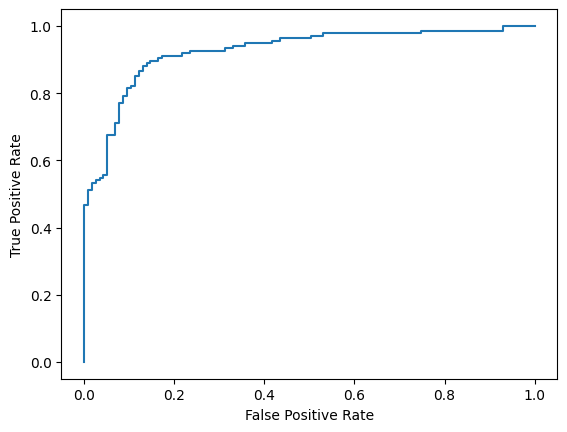

In [8]:
from sklearn.metrics import roc_curve
positive_predictions = y_pred_prob[:, 1]
FPR, TPR, threshold_values = roc_curve(y_test, positive_predictions)

plt.plot(FPR, TPR)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [9]:
from sklearn.metrics import roc_auc_score

AUC = roc_auc_score(y_test, positive_predictions)
AUC

0.9244444444444444

AUC has nothing to do with accuracy, precision, recall, F1 score